# Task 1

In [1]:
import itertools
import random

In [2]:
depression_subcriteria = {"A1": "depressed mood...",
                         "A2": "markedly diminished interest or pleasure...",
                         "A3": "significant weight loss...",
                         "A4": "imsomnia or hypersomnia...",
                         "A5": "psychomotor agitation or retardation...",
                         "A6": "fatigue or loss of energy...",
                         "A7": "feelings of worthlessness or excessive or inappropriate guilt...",
                         "A8": "diminished ability to think or concentrate, or indecisiveness, nearly every day(either by subjective account or as observed by others",
                         "A9": "recurrent thoughts of death..."}
depression_list = list(depression_subcriteria.keys())
# for the task, it is enough to just have a list of subcriteria indices. But, I wanted to have an option to output the actual lists of criteria that can be used to diagnose MDD. For that, I need a dictironary. 

#### We iterate through all possible compinations of depression subcriteria and only output those that have A1 and/or A2.
#### It is a brute-force approach, which is generally computationally expensive. But, since we only have 9 criteria, it is not an issue.
#### On the pro side, it is simple and intuitive

In [3]:
# all possible combinations of desired length
all_combinations = [list(subset) for i in range(5, len(depression_list)+1)
                  for subset in itertools.combinations(depression_list, i)]

In [4]:
# count combinations that include criterion A1 and/or A2
count = 0
for combination in all_combinations:
    if 'A1' in combination or 'A2' in combination:
        count += 1
print('There are %s good combinations.' %str(count))

There are 227 good combinations.


In [5]:
# ADDITIONALLY
# if we needed to also save all the valid combinations, we would take this approach:

good_combinations = []
for combination in all_combinations:
    if 'A1' in combination or 'A2' in combination:
        good_combinations.append(combination)

print('The number of good combinations is:', len(good_combinations))
# Printing a random combinations
print('One of those combinations is:', [depression_subcriteria[x] for x in random.choice(good_combinations)])

The number of good combinations is: 227
One of those combinations is: ['depressed mood...', 'markedly diminished interest or pleasure...', 'significant weight loss...', 'imsomnia or hypersomnia...', 'diminished ability to think or concentrate, or indecisiveness, nearly every day(either by subjective account or as observed by others', 'recurrent thoughts of death...']


# Task 2

#### Some calculations to assist me in task 2
##### How many times we have each unique sub-criterion?

In [6]:
flat_list = [item for sublist in good_combinations for item in sublist]
for i in depression_list:
    print(i, flat_list.count(i))

A1 163
A2 163
A3 141
A4 141
A5 141
A6 141
A7 141
A8 141
A9 141


##### How many times A1 and A2 appear together vs. how many times A1 appears with any other sub-criterion?

In [7]:
counter_a1_a2 = 0
counter_a1_a7 = 0
counter_a4_a7 = 0
for c in good_combinations:
    if 'A1' in c and 'A2' in c:
        counter_a1_a2+=1
    if 'A1' in c and 'A7' in c:
        counter_a1_a7+=1
    if 'A4' in c and 'A7' in c:
        counter_a4_a7+=1
print(counter_a1_a2)
print(counter_a1_a7)
print(counter_a4_a7)

99
99
83


##### How many unique combinations we would have if we could remove one crierion? What about two or more?


In [10]:
criteria_removed = 2;
depression_list = list(depression_subcriteria.keys())
depression_list = depression_list[:-criteria_removed] 
all_combinations = [list(subset) for i in range(5, len(depression_list)+1)
                  for subset in itertools.combinations(depression_list, i)]
count = 0
for combination in all_combinations:
    if 'A1' in combination or 'A2' in combination:
        count += 1
        #print(combination)
print('There are %s good combinations.' %str(count))


There are 28 good combinations.


##### Removing 1 criterion results in 86 possible combinations
##### Removing 2 criteria results in 28 possible combinations
##### Removing 3 criteria results in only 7 possible combinations

#### How many possbile comparisons there are between those combinations?

In [16]:
combinations = 227 # 227 or 86 or 28 or 7

k = combinations*(combinations-1)/2

print(k)

25651.0


##### 227 combinations - 25651 comparisons
##### 86 combinations - 3655 comparisons
##### 28 combinations - 378 comparisons
##### 7 combinations - 21 comparisons

#### Plot for correlation matrix

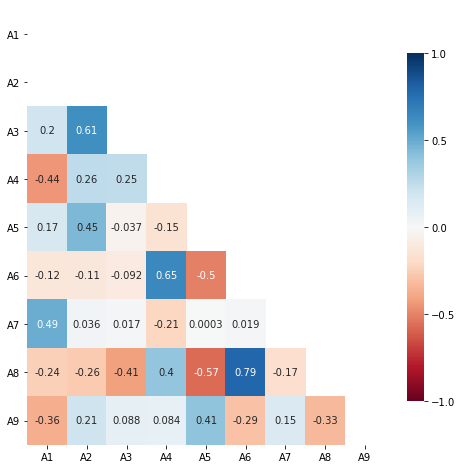

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(9, 9))
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
mask[1,0]=True #because we are not interested in cross-correlating sub-criteria A1 and A2


f, ax = plt.subplots(figsize=(8, 8)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = False,
                      cmap = 'RdBu',
                      cbar_kws = {'shrink': .8, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10},
                     )
ax.set_yticklabels(list(depression_subcriteria.keys()), rotation = 0)
ax.set_xticklabels(list(depression_subcriteria.keys()))
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [29]:
heatmap.get_figure().savefig('heatmap.png')

Top Absolute Correlations
5  7    0.792286
3  5    0.645247
dtype: float64
